# Εισαγωγή

H ομάδα μας αποτελείται από τα παρακάτω μέλη: 
* Αστρινάκης Νικόλαος (03117008)
* Καπαρού Αλεξάνδρα (03117100)
* Ταμπακάκης Χρήστος (03117042)

Στον αριθμό της ομάδας μας (100) αντιστοιχούν τα παρακάτω UCL και Kaggle datasets:
* UCL dataset : U13
* Kaggle dataset : K07 

# **Μέρος 2. Kaggle dataset**

## Εισαγωγή και επισκόπηση

*Εισαγωγή dataset:*

---



In [ ]:
from google.colab import drive
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/gdrive/MyDrive/NeuralNetworks/Kaggle'
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# Complete path to storage location of the .zip file of data
zip_path = '/gdrive/MyDrive/NeuralNetworks/Kaggle/dry-bean-dataset.zip'
# Check current directory (be sure you're in the directory where Colab operates: '/content')
os.getcwd()
# Copy the .zip file into the present directory
!cp '{zip_path}' .
# Unzip quietly 
!unzip -q -n 'dry-bean-dataset.zip' #if file already exists, don't overwrite
# View the unzipped contents in the virtual machine
os.listdir()

['.config', 'dry-bean-dataset.zip', 'Dry_Bean.csv', 'sample_data']

In [ ]:
import pandas as pd
import numpy as np

beans = pd.read_csv("Dry_Bean.csv", header=None)
beans.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
1,28395,610.291,208.1781167,173.888747,1.197191424,0.549812187,28715,190.1410973,0.763922518,0.988855999,0.958027126,0.913357755,0.007331506,0.003147289,0.834222388,0.998723889,SEKER
2,28734,638.018,200.5247957,182.7344194,1.097356461,0.411785251,29172,191.2727505,0.783968133,0.984985603,0.887033637,0.953860842,0.006978659,0.003563624,0.909850506,0.998430331,SEKER
3,29380,624.11,212.8261299,175.9311426,1.209712656,0.562727317,29690,193.4109041,0.778113248,0.989558774,0.947849473,0.908774239,0.007243912,0.003047733,0.825870617,0.999066137,SEKER
4,30008,645.884,210.557999,182.5165157,1.153638059,0.498615976,30724,195.4670618,0.782681273,0.976695743,0.903936374,0.928328835,0.007016729,0.003214562,0.861794425,0.994198849,SEKER


*Πλήθος δειγμάτων και χαρακτηριστικών, είδος όλων των χαρακτηριστικών:*

---



In [ ]:
print("Το πλήθος των δειγμάτων ισούται με", beans.shape[0] - 1)
print("Το πλήθος των χαρακτηριστικών ισούται με", beans.shape[1])

Το πλήθος των δειγμάτων ισούται με 13611
Το πλήθος των χαρακτηριστικών ισούται με 17


In [ ]:
for i in range(beans.shape[1]):
  print(beans[i][0], type(beans[i][1]))

Area <class 'str'>
Perimeter <class 'str'>
MajorAxisLength <class 'str'>
MinorAxisLength <class 'str'>
AspectRation <class 'str'>
Eccentricity <class 'str'>
ConvexArea <class 'str'>
EquivDiameter <class 'str'>
Extent <class 'str'>
Solidity <class 'str'>
roundness <class 'str'>
Compactness <class 'str'>
ShapeFactor1 <class 'str'>
ShapeFactor2 <class 'str'>
ShapeFactor3 <class 'str'>
ShapeFactor4 <class 'str'>
Class <class 'str'>


Όπως βλέπουμε από τον πίνακα πιο πάνω, το dataset έχει αφιερώσει την πρώτη σειρά του στις επικεφαλίδες του κάθε χαρακτηριστικού. Έχουμε λοιπόν 13611 δείγματα και 17 χαρακτηριστικά, ανάμεσα στα οποία το ένα είναι η ετικέτα που αντιστοιχεί στην ποικιλία στην οποία ανήκει το κάθε δείγμα. Τα υπόλοιπα χαρακτηριστικά είναι όλα αριθμητικές τιμές που περιγράφουν το σχήμα του φασολιού, όλα είναι τύπου *float* εκτός από τα $Area$ και $ConvexArea$, τα οποία είναι *int*. Μάλιστα, πολλές από τις τιμές φαίνονται να είναι κανονικοποιημένες, όπως το $Roundness$ ή τα $ShapeFactors$.

Ωστόσο το dataset χρειάζεται μια προεπεξεργασία διότι έχει ερμηνεύσει όλες τις τιμές σαν *strings*. Επομένως θα ξαναδιαβάσουμε το αρχείο αλλά αυτή τη φορά με κατάλληλες παραμέτρους εφόσον γνωρίζουμε πλέον τα datatypes της κάθε στήλης.

In [ ]:
beans = pd.read_csv("Dry_Bean.csv", header=None, dtype={0:int, 1:float, 2:float, 3:float, 4:float, 5:float, 6:int, 7:float, 8:float, 9:float, 10:float, 11:float, 12:float, 13:float, 14:float, 15:float, 16:str}, skiprows=1)

In [ ]:
labels_beans = beans.iloc[:, [16]]
features_beans = beans.iloc[:, :16]

# μετατρέπουμε το dataframe σε numpy array
features_beans = features_beans.values
labels_beans = labels_beans.values.flatten()
labels_beans, labels, label_counts = np.unique(labels_beans, return_inverse=True, return_counts=True) #αντιστοιχίζουμε την κάθε κλάση σε έναν ακέραιο

print(features_beans[0]) #τυπώνουμε το πρώτο δείγμα
print(features_beans.shape) #τυπώνουμε τις διαστάσεις του πίνακα των χαρακτηριστικών
print(labels_beans)

[2.83950000e+04 6.10291000e+02 2.08178117e+02 1.73888747e+02
 1.19719142e+00 5.49812187e-01 2.87150000e+04 1.90141097e+02
 7.63922518e-01 9.88855999e-01 9.58027126e-01 9.13357755e-01
 7.33150600e-03 3.14728900e-03 8.34222388e-01 9.98723889e-01]
(13611, 16)
['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


*Επικεφαλίδες, αρίθμηση γραμμών:*

---



In [ ]:
pd.read_csv("Dry_Bean.csv", header=None).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
1,28395,610.291,208.1781167,173.888747,1.197191424,0.549812187,28715,190.1410973,0.763922518,0.988855999,0.958027126,0.913357755,0.007331506,0.003147289,0.834222388,0.998723889,SEKER
2,28734,638.018,200.5247957,182.7344194,1.097356461,0.411785251,29172,191.2727505,0.783968133,0.984985603,0.887033637,0.953860842,0.006978659,0.003563624,0.909850506,0.998430331,SEKER
3,29380,624.11,212.8261299,175.9311426,1.209712656,0.562727317,29690,193.4109041,0.778113248,0.989558774,0.947849473,0.908774239,0.007243912,0.003047733,0.825870617,0.999066137,SEKER
4,30008,645.884,210.557999,182.5165157,1.153638059,0.498615976,30724,195.4670618,0.782681273,0.976695743,0.903936374,0.928328835,0.007016729,0.003214562,0.861794425,0.994198849,SEKER


Όπως βλέπουμε παραπάνω, παρέχονται επικεφαλίδες που βρίσκονται στην πρώτη σειρά, η οποία θα πρέπει να παραληφθεί από τον πίνακα, καθώς επίσης και αρίθμηση γραμμών από το 1 έως και το 13611.

*Ετικέτες κλάσεων:*

---



Οι ετικέτες των κλάσεων βρίσκονται στην τελευταία στήλη του πίνακα κάτω από το όνομα *Class* και παίρνουν τιμές από το σύνολο *{BARBUNYA, BOMBAY, CALI, DERMASON, HOROZ, SEKER, SIRA}*.

*Απουσιάζουσες τιμές:*

---



Προκειμένου να εντοπίσουμε αν υπάρχουν απουσιάζουσες τιμές οπουδήποτε στον πίνακα χρησιμοποιούμε την συνάρτηση isnull().

In [ ]:
beans.isnull().values.any()

False

Βλέπουμε ότι επιστρέφει False άρα δεν υπάρχουν απουσιάζουσες τιμές, ωστόσο για έναν παραπάνω έλεγχο τσεκάρουμε αν υπάρχουν απουσιάζουσες τιμές ανά στήλη:

In [ ]:
beans.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

Από όπου βλέπουμε πάλι ότι δεν υπάρχουν απουσιάζουσες τιμές.

*Πλήθος κλάσεων και ποσοστά δειγμάτων τους επί του συνόλου:*

---



Στο dataset έχουμε 7 διαφορετικά classes, και κατά τη μετατροπή των ονομάτων των ποικιλιών σε αριθμούς, η συνάρτηση μας επέστρεψε και μία λίστα με τη συχνότητα εμφάνισης της κάθε ποικιλίας.

In [ ]:
total = sum(label_counts)

print(labels)
for i, k in enumerate(labels_beans):
  print(k, "---", label_counts[i], "---", label_counts[i]*100/total, "%")

[5 5 5 ... 3 3 3]
BARBUNYA --- 1322 --- 9.7127323488355 %
BOMBAY --- 522 --- 3.835133348027331 %
CALI --- 1630 --- 11.975607964146645 %
DERMASON --- 3546 --- 26.05245757108221 %
HOROZ --- 1928 --- 14.16501359194769 %
SEKER --- 2027 --- 14.8923664682977 %
SIRA --- 2636 --- 19.36668870766292 %


Παρατηρούμε ότι το dataset που μας δόθηκε δεν είναι πολύ ισορροπημένο. Η ποικιλία με τα περισσότερα δείγματα (Dermason) έχει περίπου επταπλάσια δείγματα από εκείνη με τα λιγότερα (Bombay). Στις υπόλοιπες κλάσεις ωστόσο δεν έχουμε τόσο ακραίες διαφοροποιήσεις.

*Παρουσίαση του dataset:*

---



Με βάση την επίσημη περιγραφή που υπάρχει στο Kaggle προκύπτει ότι το dataset που μας έχει δωθεί περιέχει δεδομένα που αφορούν τις εικόνες από 7 διαφορετικά είδη ξηρών φασολιών (*Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira*). Τα δεδομένα που περιέχονται στο dataset είναι μετρήσεις που αφορούν το σχήμα του κάθε φασολιού, περιέχονται 16 διαφορετικά χαρακτηριστικά για κάθε δείγμα, τα οποία εν συντομία είναι:
* Area ($A$) : Ο αριθμός των pixel που αναπαριστούν το εκάστοτε είδος φασολιού.
* Perimeter ($P$) : Η περίμετρος του φασολιού οριζόμενη ως το μήκος του συνόρου που διαχωρίζει το φασόλι από το background στην εικόνα.
* Major axis length ($L$) : Η απόσταση από τις δύο άκρες του φασολιού που έχουν μεταξύ τους την μεγαλύτερη απόσταση σε σχέση με τα υπόλοιπα σημεία.
* Minor axis length ($l$): Η απόσταση από τις δύο άκρες του φασολιού που έχουν μεταξύ τους την μικρότερη απόσταση σε σχέση με τα υπόλοιπα σημεία.
* Aspect ratio ($K$) : O λόγος των $L, l$.
* Eccentricity ($E_c$) : Η εκκεντρότητα της έλλειψης του φασολιού.
* Convex area ($C$) : O αριθμός των pixels του μικρότερου κυρτού πολυγώνου που είναι εγγεγραμένο στο σχήμα του φασολιού.
* Equivalent diameter ($E_d$) : H διάμετρος του κύκλου με εμβαδόν ίσο με το εμβαδόν του φασολιού.
* Extent ($Ex$) : Ο λόγος του αριθμού των pixels του περιγεγραμμένου τετραγώνου του φασολιού προς τον αριθμό των pixels του φασολιού.
* Solidity ($S$) : Η κυρτότητητα του φασολιού, δηλαδή ο λόγος των pixels του κυρτού φλοιού προς τον αριθμό των pixels του φασολιού.
* Roundness ($R$) : To αποτέλεσμα του τύπου $\frac{4πA}{P^2}$.
* Compactness ($CO$) : To αποτέλεσμα του τύπου $\frac{E_d}{L}$.
* ShapeFactor1-4 ($SF_{1-4}$): 4 μετρικές των οποίων ο υπολογισμός δε προσδριορίζεται, αλλά αφορούν το σχήμα του δείγματος


## Μετρικές

Όσον αφορά τις μετρικές επιλέξαμε να χρησιμοποιήσουμε το f1 score παρουσιάζοντας όμως και το accuracy στην out-of-the-box ταξινόμηση, καθαρά προς σύγκριση, χωρίς ωστόσο να χρησιμοποιείται στην βελτιστοποίηση. Ο λόγος για τον οποίο καταλήξαμε ότι το f1 score θεωρείται καλύτερη μετρική απόδοσης είναι το γεγονός ότι συνδυάζει δύο μετρικές σε μία (δηλαδή precision και recall) επομένως παρουσιάζει πιο ακριβή αποτελέσματα. Ακόμα, δεδομένου ότι το f1 score προτιμάται όταν έχουμε μη ισορροπημένες κλάσεις (όπως έχουμε εμείς) η μετρική αυτή είναι η ιδανική για την περίπτωση μας, καθώς η ακρίβεια μπορεί να αυξηθεί σε βάρος των μικρότερων κλάσεων. 

## Προετοιμασία

*Διαχωρισμός του συνόλου δεδομένων σε σύνολο εκπαίδευσης (train set) και σύνολο (test set):*

---



Ορίζουμε το test set μας να έχει μέγεθος 30% των δειγμάτων. Αυτή η τιμή δεν έχει κάποια ιδιαίτερη σημασία και την επιλέγουμε απλώς για την πρώτη φάση της out-of-the-box επίδοσης. Στη συνέχεια θα είναι μία από τις παραμέτρους που θα βελτιστοποιηθεί.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test, train_labels, test_labels = train_test_split(features_beans, labels, test_size=0.3)

In [ ]:
print("Train data shape:", train.shape)
print("Train labels:", train_labels.shape[0])
print("Test data shape:", test.shape)
print("Test labels:", test_labels.shape[0])

Train data shape: (9527, 16)
Train labels: 9527
Test data shape: (4084, 16)
Test labels: 4084


In [ ]:
_, test_counts = np.unique(test_labels, return_counts=True)
total = sum(test_counts)

for i, k in enumerate(labels_beans):
  print(k, "---", test_counts[i], "---", test_counts[i]*100/total, "%")

BARBUNYA --- 370 --- 9.059745347698335 %
BOMBAY --- 153 --- 3.7463271302644467 %
CALI --- 522 --- 12.78158667972576 %
DERMASON --- 1055 --- 25.832517140058766 %
HOROZ --- 546 --- 13.369245837414299 %
SEKER --- 618 --- 15.132223310479922 %
SIRA --- 820 --- 20.078354554358473 %


*Ανάγκη εξισορρόπησης του train set με χρήση της βιβλιοθήκης **imbalanced-learn**:*

---



Θα χρειαστεί στη συνέχεια να χρησιμοποιήσουμε την τεχνική του oversampling για να εξισορροπήσουμε το train set, θα εισάγουμε δηλαδή στο train αντίγραφα κάποιων δειγμάτων από τις κλάσεις που έχουν μικρότερο πλήθος. Προς το παρόν επειδή θέλουμε να δούμε τις out-of-the-box επιδόσεις θα αφήσουμε το train set ως έχει, αλλά στη συνέχεια θα χρειαστεί να προσθέσουμε έναν oversampler στο pipeline.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer

ros = RandomOverSampler()

train_resampled, train_labels_resampled = ros.fit_resample(train,train_labels)

# εκτυπώνουμε τις νέες διαστάσεις του train set
print(train_resampled.shape)
print(train_labels_resampled.shape)
print("\n")
print(train_resampled)
print(train_labels_resampled)

_, counts = np.unique(train_labels_resampled, return_counts=True)
print(counts)

(17437, 16)
(17437,)


[[3.50080000e+04 7.00041000e+02 2.59077989e+02 ... 2.01314800e-03
  6.64073858e-01 9.97764975e-01]
 [7.57610000e+04 1.04026700e+03 4.07384015e+02 ... 1.12055600e-03
  5.81229768e-01 9.95858096e-01]
 [4.33360000e+04 7.81647000e+02 2.77534312e+02 ... 2.02721000e-03
  7.16350508e-01 9.96774948e-01]
 ...
 [4.88540000e+04 8.37407000e+02 3.09648067e+02 ... 1.64548900e-03
  6.48744217e-01 9.97048112e-01]
 [4.21810000e+04 7.73080000e+02 2.95771333e+02 ... 1.63022900e-03
  6.13924314e-01 9.96626419e-01]
 [3.94340000e+04 7.28011000e+02 2.65960282e+02 ... 2.09614100e-03
  7.09818608e-01 9.94143582e-01]]
[3 2 6 ... 6 6 6]
[2491 2491 2491 2491 2491 2491 2491]


Αξίζει να σημειωθεί ότι η επέμβαση του oversampling γίνεται μόνο στο train set. Η χρήση αυτής της τεχνικής γίνεται λόγω ανάγκης, και σίγουρα δεν είναι ισάξια με τη χρήση ενός ισορροπημένου dataset, ωστόσο έχει αποδειχθεί ότι μπορεί να επωφελήσει τον classifier σε πολλές περιπτώσεις. Στον αντίποδα, το oversampling στο test set θα κατέστρεφε τη διαδικασία της εκπαίδευσης.

Αν κάναμε oversampling πριν το train/test split, θα είχαμε τον κίνδυνο το ίδιο δείγμα να καταλήξει και στα δύο sets, το οποίο αναιρεί όλο το σκοπό του διαχωρισμού τους. Αν από την άλλη κάναμε εκ των υστέρων oversampling στο test set, οι μετρικές της ακρίβειας του classifier θα ήταν λανθασμένες. Αφού ο classifier δουλεύει με ντετερμινιστικό τρόπο τότε όλα τα αντίγραφα του ίδιου δείγματος θα ταξινομούνταν στην ίδια τάξη, με αποτέλεσμα να υπερεκτιμηθεί η αξία του αποτελέσματος του classifier στο συγκεκριμένο δείγμα, είτε είναι θετικό είτε αρνητικό.

*Διαχείριση απουσιάζουσων τιμών:*

---



Όπως και στο πρώτο μέρος, έτσι και εδώ δε χρειάζεται κάποια ειδική μεταχείριση για απουσιάζουσες τιμές εφόσον δεν υπάρχουν στο dataset μας.

*Διαχείριση κατηγορικών ή/και μη διατεταγμένων χαρακτηριστικών:*

---



Δεν υπάρχει ανάγκη ιδιαίτερης μεταχείρισης διότι κανένα από τα χαρακτηριστικά του συνόλου δεν είναι μη αριθμητικό ή/και μη διατεταγμένο.

## Σχήμα CV

Για τη βελτιστοποίηση θα χρησιμοποιήσουμε την βιβλιοθήκη optuna, και συγκεκριμένα την μέθοδο `optimize` της κλάσης `study`. Αυτή η μέθοδος δεν πραγματοποιεί Cross-Validation, αλλά κάνει αναζήτηση υπερπαραμέτρων προσπαθώντας να ελαχιστοποιήσει κάποιο σφάλμα το οποίο ορίζουμε εμείς.

Συγκεκριμένα, ορίζουμε για κάθε ταξινομητή μια συνάρτηση `objective`, η οποία χρησιμοποιώντας κάθε φορά ένα συνδυασμό υπερπαραμέτρων, κατασκευάζει ένα instance του ταξινομητή, το εκπαιδεύει στο train set και το δοκιμάζει στο αντίστοιχο test set, και επιστρέφει τη μετρική την οποία θέλουμε να ελαχιστοποιήσουμε. Στη δική μας περίπτωση θέλουμε να μεγιστοποιήσουμε την $F1$ οπότε η τιμή που επιστρέφουμε είναι η $1-F1$. Στο τέλος, η κλάση `study` μπορεί να μας προσδιορίσει το συνδυασμό υπερπαραμέτρων που επέστρεψε την καλύτερη τιμή.

## Ταξινόμηση

### *Επίδοση out-of-the-box:*

---



#### Dummy σαν baseline

Αρχικά δουλέψαμε με τον κλασσικό dummy ταξινομητή προκειμένου να γνωρίζουμε ένα κατώτερο όριο απόδοσης για τους υπολοίπους ταξινομητές μας

In [ ]:
from sklearn.dummy import DummyClassifier

dc_uniform = DummyClassifier(strategy = "uniform")
#train the classifier
dc_uniform_model = dc_uniform.fit(train, train_labels)
#predictions for the input
dc_uniform_preds = dc_uniform.predict(test)

print("Uniform: ", dc_uniform_preds)

dc_constant_0 = DummyClassifier(strategy = "constant", constant = 0)
dc_constant_0_model = dc_constant_0.fit(train, train_labels)
dc_constant_0_preds = dc_constant_0.predict(test)

print("Constant 0: ", dc_constant_0_preds)

dc_constant_1 = DummyClassifier(strategy = "constant", constant = 1)
dc_constant_1_model = dc_constant_1.fit(train, train_labels)
dc_constant_1_preds = dc_constant_1.predict(test)

print("Constant 1: ", dc_constant_1_preds)

dc_most_frequent = DummyClassifier(strategy = "most_frequent")
dc_most_frequent_model = dc_most_frequent.fit(train, train_labels)
dc_most_frequent_preds = dc_most_frequent.predict(test)

print("Most Frequent: ", dc_most_frequent_preds)

dc_stratified = DummyClassifier(strategy = "stratified")
dc_stratified_model = dc_stratified.fit(train, train_labels)
dc_stratified_preds = dc_stratified.predict(test)

print("Stratified: ", dc_stratified_preds)

Uniform:  [6 4 6 ... 4 5 0]
Constant 0:  [0 0 0 ... 0 0 0]
Constant 1:  [1 1 1 ... 1 1 1]
Most Frequent:  [3 3 3 ... 3 3 3]
Stratified:  [3 4 6 ... 5 0 3]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#for accuracy
beans_accuracy = {}

beans_accuracy['uniform (random)'] = dc_uniform.score(test, test_labels)
beans_accuracy['constant 0'] = dc_constant_0.score(test, test_labels)
beans_accuracy['constant 1'] = dc_constant_1.score(test, test_labels)
beans_accuracy['most frequent label'] = dc_most_frequent.score(test, test_labels)
beans_accuracy['stratified'] = dc_stratified.score(test, test_labels)

print("Classification Accuracy: \n")
sorted_accuracy = [(k, beans_accuracy[k]) for k in sorted(beans_accuracy, key = beans_accuracy.get, reverse = True)]

for k, v in sorted_accuracy:
  print(k.title(), ":", np.round(100 * v, 3), "%")


Classification Accuracy: 

Most Frequent Label : 25.833 %
Stratified : 16.895 %
Uniform (Random) : 14.153 %
Constant 0 : 9.06 %
Constant 1 : 3.746 %


In [ ]:
#for F1-score

beans_f1 = {}

beans_f1['uniform (random)'] = f1_score(test_labels, dc_uniform_preds, average='macro')
beans_f1['constant 0'] = f1_score(test_labels, dc_constant_0_preds, average = 'macro')
beans_f1['constant 1'] = f1_score(test_labels, dc_constant_1_preds, average = 'macro')
beans_f1['most frequent label'] = f1_score(test_labels, dc_most_frequent_preds, average = 'macro')
beans_f1['stratified'] = f1_score(test_labels, dc_stratified_preds, average = 'macro')


print("\nClassification F1: \n")
sorted_f1 = [(k, beans_f1[k]) for k in sorted(beans_f1, key = beans_f1.get, reverse = True)]

for k, v in sorted_f1:
  print(k.title(), np.round(100 * v, 3), "%")


Classification F1: 

Stratified 13.63 %
Uniform (Random) 13.338 %
Most Frequent Label 5.866 %
Constant 0 2.373 %
Constant 1 1.032 %


#### Multi-Layer Perceptron (MLP)

Στην συνέχεια κάναμε χρήση του multi-layer perceptron:

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [ ]:
clf = MLPClassifier()
clf.fit(train, train_labels)
preds_mlp = clf.predict(test)

print(preds_mlp.shape)

print(classification_report(test_labels, preds_mlp))

beans_accuracy['Multi-Layer Perceptron'] = accuracy_score(test_labels, preds_mlp)
beans_f1['Multi-Layer Perceptron'] = f1_score(test_labels, preds_mlp, average='macro')

(4084,)
              precision    recall  f1-score   support

           0       0.25      0.99      0.40       370
           1       1.00      0.99      1.00       153
           2       0.00      0.00      0.00       522
           3       0.96      0.60      0.74      1055
           4       0.00      0.00      0.00       546
           5       0.34      0.95      0.50       618
           6       0.12      0.01      0.01       820

    accuracy                           0.43      4084
   macro avg       0.38      0.51      0.38      4084
weighted avg       0.38      0.43      0.34      4084



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Παρατηρούμε ότι η python βγάζει σαν warning ότι "*precision and F-score is ill-defined and being set to 0.0 in labels with no predicted samples*". Αυτό σημαίνει ότι υπάρχουν ετικέτες στο `test_labels` που δεν υπάρχουν στο `preds_mlp`. Ο classifier δηλαδή δεν προβλέπει όλες τις ετικέτες. Σαν warning δεν μπορούμε να το αντιμετωπίσουμε κάπως καθώς δεν οφείλεται σε κάποιο λάθος χειρισμό μας. 

#### Support Vector Machine (SVM)

Ο επόμενος ταξινομητής που χρησιμοποιήσαμε είναι ο support vector machine:

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(train, train_labels)

SVC()

In [ ]:
preds_svc = svc.predict(test)

print(preds_svc.shape)

print(classification_report(test_labels, preds_svc))

beans_accuracy['Support Vector Machine'] = accuracy_score(test_labels, preds_svc)
beans_f1['Support Vector Machine'] = f1_score(test_labels, preds_svc, average='macro')

(4084,)
              precision    recall  f1-score   support

           0       0.52      0.09      0.16       370
           1       1.00      0.99      1.00       153
           2       0.63      0.88      0.73       522
           3       0.77      0.86      0.81      1055
           4       0.60      0.60      0.60       546
           5       0.41      0.28      0.33       618
           6       0.60      0.72      0.65       820

    accuracy                           0.65      4084
   macro avg       0.64      0.63      0.61      4084
weighted avg       0.62      0.65      0.62      4084



In [ ]:
print(beans_accuracy)
print(beans_f1)

{'uniform (random)': 0.14152791380999022, 'constant 0': 0.09059745347698335, 'constant 1': 0.037463271302644464, 'most frequent label': 0.25832517140058764, 'stratified': 0.16895200783545544, 'Multi-Layer Perceptron': 0.428256611165524, 'Support Vector Machine': 0.6461802154750245}
{'uniform (random)': 0.13337704888731525, 'constant 0': 0.02373468471358009, 'constant 1': 0.010317273003135643, 'most frequent label': 0.05865510243793957, 'stratified': 0.13629771353061004, 'Multi-Layer Perceptron': 0.3779728225733853, 'Support Vector Machine': 0.6111092293755457}


#### Πίνακας markdown

Παρουσιάζουμε τα αποτελέσματα που προέκυψαν σε έναν πίνακα markdown προς άμεση σύγκριση:

In [ ]:
from IPython.display import HTML, display


def print_dict_as_html_table(some_dict,dict2):
    
        # create a list that will hold the html content  
        # initialise with the <table> tag
        html_list = ["<table>"]
        html_list.append("<tr>")
        html_list.append("<th>Ταξινομητές/Μετρικές </th>")
        html_list.append("<th>Ορθότητα (%)</th>")
        html_list.append("<th>F1 score (%)</th>")
        html_list.append("</tr>")
        #iterate through the dictionary, appending row and element tags to the list
        for key in some_dict.keys():
            html_list.append("<tr>")
            html_list.append("<td>{0}</td>".format(key))
            html_list.append("<td>{0}</td>".format(np.round(100 * some_dict[key], 3)))
            html_list.append("<td>{0}</td>".format(np.round(100 * dict2[key], 3)))
            html_list.append("</tr>")
            
        # add the final </table> tag to the list
        html_list.append("</table>")
        
        # create a string from the list
        html_string = ' '.join([str(elem) for elem in html_list])

        #display the html 
        display(HTML(html_string))


print_dict_as_html_table(dict(sorted(beans_accuracy.items(), key=lambda item: item[1])),dict(sorted(beans_f1.items(), key=lambda item: item[1])))

Ταξινομητές/Μετρικές,Ορθότητα (%),F1 score (%)
constant 1,3.746,1.032
constant 0,9.06,2.373
uniform (random),14.153,13.338
stratified,16.895,13.63
most frequent label,25.833,5.866
Multi-Layer Perceptron,42.826,37.797
Support Vector Machine,64.618,61.111


#### Bar plot σύγκρισης

Αρχικά δημιουργήσαμε ένα bar plot προς σύγκριση του accuracy:

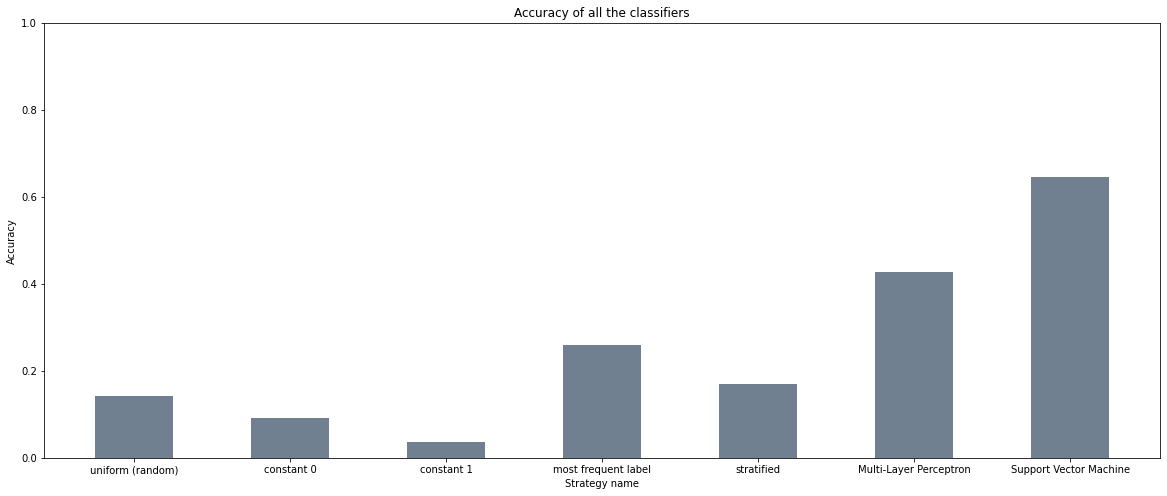

In [ ]:
import matplotlib.pyplot as plt
x = [key for key in beans_accuracy.keys()]
y = [value for value in beans_accuracy.values()]

fig = plt.figure(figsize = (20, 8))
barplot = plt.bar(x, y, width = 0.5, color = 'slategray')

plt.title("Accuracy of all the classifiers")
plt.ylabel("Accuracy")
plt.xlabel("Strategy name")
ax = plt.gca()
ax.set_ylim([0, 1])

plt.show()

Και στην συνέχεια ένα bar plot προς σύγκριση του F1 score:

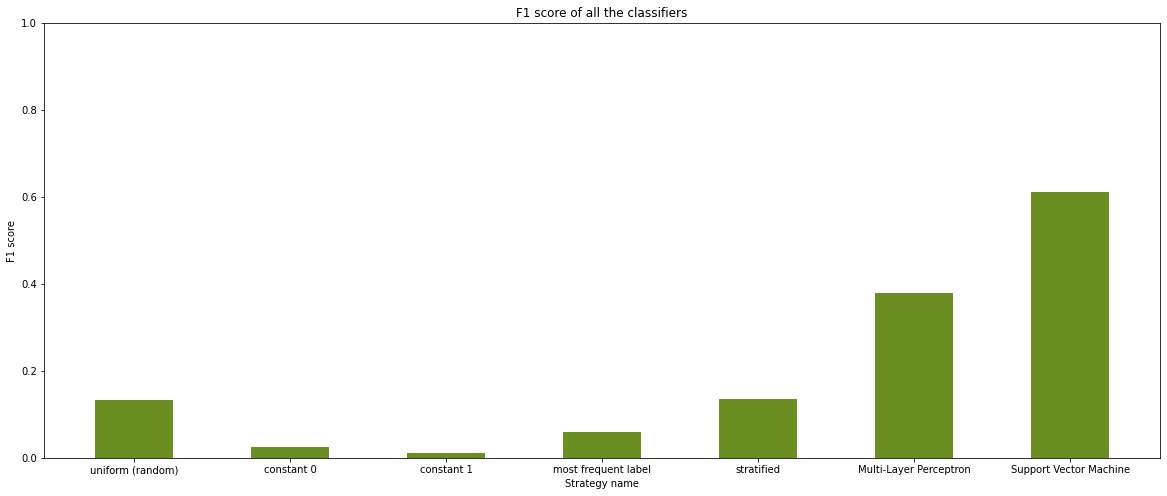

In [ ]:
x = [key for key in beans_f1.keys()]
y = [value for value in beans_f1.values()]

fig = plt.figure(figsize = (20, 8))
barplot = plt.bar(x,y, width = 0.5,color = 'olivedrab')

plt.title("F1 score of all the classifiers")
plt.ylabel("F1 score")
plt.xlabel("Strategy name")
ax = plt.gca()
ax.set_ylim([0, 1])

plt.show()

Οι επιδόσεις των `dummy classifiers` είαι σαφώς χαμηλές όπως περιμέναμε. Ειδικότερα, σε σχέση με το πρώτο μέρος της εργασίας είναι πολύ χαμηλότερα, και αυτό οφείλεται στο γεγονός ότι πλέον έχουμε πάνω από 2 πιθανές κλάσεις.

Για παράδειγμα, όταν οι κλάσεις είναι 2, ο ταξινομητής `most frequent label` εγγυάται ότι θα έχει $accuracy\ge50\%$, ενώ εδώ βλέπουμε ότι η τιμή του είναι περίπου $25\%$.

Περαιτέρω, οι ταξινομητές `constant 0` και `constant 1` δεν έχουν μεγάλο νόημα στο συγκεκριμένο dataset, περισσότερο νόημα θα είχαν 7 ταξινομητές που έδιναν πάντα ο καθένας μία από τις 7 κλάσεις, αλλά για λόγους συντομίας δεν το δοκιμάσαμε διότι τα αποτελέσματα δε θα είχαν κάποιο ενδιαφέρον.

Όσον αφορά τους δύο ταξινομητές που μας ενδιαφέρουν, ο *Multi-Layer Perceptron*, παρότι σημαντικά καλύτερος από τους dummy, δε φτάνει ούτε 50% σε καμία από τις δύο μετρικές που εξετάζουμε, με $accuracy=42.82\%$, $F1=37.80\%$. Οι χαμηλές τους επιδόσεις οφείλονται στο γεγονός ότι η προεπιλογή είναι ο ταξινομητής να έχει 1 layer το οποίο αποτελείται από 100 perceptrons. Στην πραγματικότητα η ισχύς αυτού του ταξινομητή προκύπτει από την δυνατότητα να προσθέτεις πάνω από ένα layer και να αυξήσεις τον αριθμό των perceptrons του για να κάνει πιο ακριβείς προβλέψεις.

Στον αντίποδα ο ταξινομητής *Support Vector Machine* ξεπερνάει το $60\%$ και στις δύο μετρικές, με $accuracy=64.61$, $F1=61.11$. Η υψηλή out-of-the-box αποδοση οφείλεται πιθανώς στο γεγονός ότι το dataset είναι τέτοιο που το *SVM* αποδίδει καλύτερα πάνω του.

###*Βελτιστοποίηση:*

---



Σε αυτό το κομμάτι της εργασίας μας ζητήθηκε να βελτιστοποιήσουμε τους παραπάνω ταξινομητές. Για τη βελτιστοποίηση θα χρησιμοποιήσουμε την βιβλιοθήκη optuna, η οποία θα πραγματοποιήσει αναζήτηση βέλτιστων υπερπαραμέτρων.

In [ ]:
!pip install -U imbalanced-learn
!pip install --upgrade scikit-learn
!pip install optuna

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer

     |████████████████████████████████| 308 kB 5.4 MB/s 
     |████████████████████████████████| 209 kB 41.5 MB/s 
     |████████████████████████████████| 80 kB 10.0 MB/s 
     |████████████████████████████████| 75 kB 3.6 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 112 kB 36.6 MB/s 
     |████████████████████████████████| 149 kB 54.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=b9f317eceb9e063276008324806c5914927497bc4350498bff4003baf11aa0ea
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

####**Multi-Layer Perceptron**




Αρχικά βελτιστοποιούμε τον multi-layer perceptron:

In [ ]:
def construct_mlp_pipeline(scaler, threshold, layers, solver, learning_rate):
  pipe = []
  classifier = None

  if scaler is not None:
    if scaler == 'standard':
      pipe.append(('scaler', StandardScaler()))
    elif scaler == 'minmax':
      pipe.append(('scaler', MinMaxScaler()))
    else:
      pipe.append(('scaler', MaxAbsScaler()))

  pipe.append(('selector', VarianceThreshold(threshold=threshold)))

  if solver != 'sgd':
    classifier = MLPClassifier(hidden_layer_sizes=layers, solver=solver, early_stopping=True)
  else:
    classifier = MLPClassifier(hidden_layer_sizes=layers, solver=solver, learning_rate=learning_rate, early_stopping=True)

  pipe.append(('classifier', classifier))

  return Pipeline(pipe)

In [ ]:
# Define an objective function to be minimized.
def objective_mlp(trial):

  scaler = trial.suggest_categorical('scaler', ['standard', 'minmax', 'abs', None])
  
  threshold = trial.suggest_float('selector_threshold', 0.001, 0.01, log=False, step=0.003)

  layer1 = trial.suggest_int('layer1', 50, 200, 50)
  layer2 = trial.suggest_int('layer2', 0, 200, 50)
  layer3 = trial.suggest_int('layer3', 0, 200, 50)

  layers = [layer1, layer2, layer3]
  layers = [x for x in layers if x != 0]

  solver = trial.suggest_categorical('solver', ['sgd', 'adam'])
  learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive'])

  pipe = construct_mlp_pipeline(scaler, threshold, layers, solver, learning_rate)
  
  split_rate = trial.suggest_float('split_rate', 0.2, 0.4, log=False, step=0.01)
  train, test, train_labels, test_labels = train_test_split(features_beans, labels, test_size=split_rate)
  
  sampling_strategy = trial.suggest_categorical('sampling', ['auto', 'minority', None])
  
  if sampling_strategy is not None:
    ros = RandomOverSampler(sampling_strategy=sampling_strategy)
    train, train_labels = ros.fit_resample(train,train_labels)

  preds = pipe.fit(train, train_labels).predict(test)

  f1 = f1_score(test_labels, preds, average='macro')
  return 1-f1  # Προσπαθεί να ελαχιστοποιήσει την τιμή που επιστρέφει το objective function

In [ ]:
study_mlp = optuna.create_study()  # Create a new study.
study_mlp.optimize(objective_mlp, n_trials=100, show_progress_bar=True)  # Invoke optimization of the objective function.

[I 2021-11-15 16:01:14,791] A new study created in memory with name: no-name-cfa4011c-1efc-4553-9e5f-70847a219dd7
/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/100 [00:00<?, ?it/s]

[I 2021-11-15 16:01:32,619] Trial 0 finished with value: 0.5195829686978346 and parameters: {'scaler': 'standard', 'selector_threshold': 0.001, 'layer1': 50, 'layer2': 100, 'layer3': 100, 'solver': 'sgd', 'learning_rate': 'invscaling', 'split_rate': 0.26, 'sampling': 'auto'}. Best is trial 0 with value: 0.5195829686978346.
[I 2021-11-15 16:01:40,721] Trial 1 finished with value: 0.7179935049675189 and parameters: {'scaler': None, 'selector_threshold': 0.001, 'layer1': 200, 'layer2': 0, 'layer3': 100, 'solver': 'adam', 'learning_rate': 'invscaling', 'split_rate': 0.37, 'sampling': 'minority'}. Best is trial 0 with value: 0.5195829686978346.
[I 2021-11-15 16:01:50,113] Trial 2 finished with value: 0.06393344967649217 and parameters: {'scaler': 'minmax', 'selector_threshold': 0.004, 'layer1': 100, 'layer2': 50, 'layer3': 50, 'solver': 'adam', 'learning_rate': 'constant', 'split_rate': 0.30000000000000004, 'sampling': 'minority'}. Best is trial 2 with value: 0.06393344967649217.
[I 2021-11

In [ ]:
print(study_mlp.best_params)

{'scaler': 'minmax', 'selector_threshold': 0.004, 'layer1': 50, 'layer2': 200, 'layer3': 200, 'solver': 'adam', 'learning_rate': 'adaptive', 'split_rate': 0.26, 'sampling': None}


#####Παρατηρήσεις

* Η πρώτη εκτέλεση του αλγορίθμου για εύρεση βέλτιστων τιμών έδωσε αποτελέσματα $layers={50,200,200}$. Για το δεύτερο και τρίτο layer οι τιμές των perceptrons ήταν οι μέγιστες που ορίσαμε ως δυνατές, συνεπώς έπρεπε να ξαναγίνει εκτέλεση του κώδικα, μεταφέροντας το πλαίσιο αναζήτησης των layers προς τα πάνω και προσθέτοντας ένα παραπάνω layer για να δούμε τη διαφορά. Ταυτόχρονα, θα πειραματιστούμε και με την αρχική τιμή του `learning_rate`.

* Στην πρώτη εκτέλεση χρησιμοποιήσαμε τον default single-objective sampler της Optuna, τον TPESampler (Tree-structured Parzen Estimator). Στη συνέχεια θα χρησιμοποιήσουμε τον GridSampler, για να μπορέσουμε να ελέγξουμε ακριβώς τις τιμές που μπορεί να πάρει η κάθε μεταβλητή.

* Βλέπουμε ότι στην πρώτη αναζήτηση, η βέλτιστη λύση βρέθηκε να μη χρησιμοποιεί Oversampling στο train set. Αυτό ίσως υποδεικνύει ότι το dataset μας είναι τέτοιο που το oversampling χαλάει την ικανότητα γενίκευσής του. Για να είμαστε σίγουροι ωστόσο, θα αφήσουμε και αυτό σαν μεταβλητή στη δεύτερη αναζήτηση υπερπαραμέτρων.

Βέλτιστες υπερπαράμετροι πρώτης εκτέλεσης με `F1 = 0.93792336916`:

`{'scaler': 'minmax', 'selector_threshold': 0.004, 'layer1': 50, 'layer2': 200, 'layer3': 200, 'solver': 'adam', 'learning_rate': 'adaptive', 'split_rate': 0.26, 'sampling': None}`

In [ ]:
def construct_mlp_pipeline(scaler, threshold, layers, solver, learning_rate, learning_rate_init):
  pipe = []
  classifier = None

  if scaler != 'none':
    if scaler == 'standard':
      pipe.append(('scaler', StandardScaler()))
    elif scaler == 'minmax':
      pipe.append(('scaler', MinMaxScaler()))
    else:
      pipe.append(('scaler', MaxAbsScaler()))

  pipe.append(('selector', VarianceThreshold(threshold=threshold)))

  if solver != 'sgd':
    classifier = MLPClassifier(hidden_layer_sizes=layers, solver=solver, learning_rate_init=learning_rate_init, early_stopping=True)
  else:
    classifier = MLPClassifier(hidden_layer_sizes=layers, solver=solver, learning_rate=learning_rate, learning_rate_init=learning_rate_init, early_stopping=True)

  pipe.append(('classifier', classifier))

  return Pipeline(pipe)

In [ ]:
# Define an objective function to be minimized.
def objective_mlp(trial):

  scaler = 'minmax'
  
  threshold = 0.004

  layer1 = 50
  layer2 = trial.suggest_int('layer2', 150, 300, 50)
  layer3 = trial.suggest_int('layer3', 150, 300, 50)
  layer4 = trial.suggest_int('layer4', 0, 300, 50)

  layers = [layer1, layer2, layer3, layer4]
  layers = [x for x in layers if x != 0]

  solver = 'adam'
  learning_rate = None

  learning_rate_init = trial.suggest_float('learning_rate_init', 0.0005, 0.005)

  pipe = construct_mlp_pipeline(scaler, threshold, layers, solver, learning_rate, learning_rate_init)
  
  split_rate = 0.26
  train, test, train_labels, test_labels = train_test_split(features_beans, labels, test_size=split_rate)
  
  sampling_strategy = trial.suggest_categorical('sampling', ['auto', 'none'])
  
  if sampling_strategy != 'none':
    ros = RandomOverSampler(sampling_strategy=sampling_strategy)
    train, train_labels = ros.fit_resample(train,train_labels)

  preds = pipe.fit(train, train_labels).predict(test)

  f1 = f1_score(test_labels, preds, average='macro')
  return 1-f1  # Προσπαθεί να ελαχιστοποιήσει την τιμή που επιστρέφει το objective function

In [ ]:
mlp_search_space = {
    'layer2' : [150, 200, 250, 300],
    'layer3' : [150, 200, 250, 300],
    'layer4' : [0, 150, 200, 250, 300],
    'sampling' : ['auto', 'none'],
    'learning_rate_init' : [0.0005, 0.001, 0.003, 0.005]
}

study_mlp = optuna.create_study(sampler=optuna.samplers.GridSampler(mlp_search_space))  # Create a new study.
study_mlp.optimize(objective_mlp, show_progress_bar=True)  # Invoke optimization of the objective function.

[I 2021-11-19 00:58:10,806] A new study created in memory with name: no-name-e756701e-3964-4a20-be6c-de025d6826fe
/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



0it [00:00, ?it/s]

[I 2021-11-19 00:58:22,481] Trial 0 finished with value: 0.06606018654225565 and parameters: {'layer2': 200, 'layer3': 200, 'layer4': 0, 'learning_rate_init': 0.001, 'sampling': 'none'}. Best is trial 0 with value: 0.06606018654225565.
[I 2021-11-19 00:58:53,078] Trial 1 finished with value: 0.07395317461106876 and parameters: {'layer2': 250, 'layer3': 200, 'layer4': 0, 'learning_rate_init': 0.005, 'sampling': 'auto'}. Best is trial 0 with value: 0.06606018654225565.
[I 2021-11-19 00:59:23,824] Trial 2 finished with value: 0.05988880208516889 and parameters: {'layer2': 150, 'layer3': 300, 'layer4': 250, 'learning_rate_init': 0.003, 'sampling': 'none'}. Best is trial 2 with value: 0.05988880208516889.
[I 2021-11-19 00:59:40,953] Trial 3 finished with value: 0.06413524972715856 and parameters: {'layer2': 250, 'layer3': 200, 'layer4': 150, 'learning_rate_init': 0.001, 'sampling': 'none'}. Best is trial 2 with value: 0.05988880208516889.
[I 2021-11-19 00:59:53,699] Trial 4 finished with va

In [ ]:
print(study_mlp.best_params)

{'layer2': 150, 'layer3': 200, 'layer4': 200, 'learning_rate_init': 0.0005, 'sampling': 'auto'}


In [ ]:
import time

train_time = {}
test_time = {}

acc = {}
f1 = {}

In [ ]:
layers = [50, 150, 200, 200]

train_mlp, test_mlp, train_labels_mlp, test_labels_mlp = train_test_split(features_beans, labels, test_size=0.26)
ros = RandomOverSampler(sampling_strategy='auto')
train_mlp, train_labels_mlp = ros.fit_resample(train_mlp, train_labels_mlp)

classifier_mlp = construct_mlp_pipeline('minmax', 0.004, layers, 'adam', 'adaptive', 0.003)

start_time = time.time()
classifier_mlp.fit(train_mlp, train_labels_mlp)
train_time["mlp"] = np.round(time.time() - start_time, 4)

start_time = time.time()
preds_mlp = classifier_mlp.predict(test_mlp)
test_time["mlp"] = np.round(time.time() - start_time, 4)

acc["mlp"] = accuracy_score(test_labels_mlp, preds_mlp)
f1["mlp"] = f1_score(test_labels_mlp, preds_mlp, average='macro')

print("Accuracy =", acc["mlp"])
print("F1 =", f1["mlp"])
print("Train Time=", train_time["mlp"], "sec")
print("Test Time=", test_time["mlp"], "sec")

Accuracy = 0.9268154846001695
F1 = 0.9375464396024471
Train Time= 30.842 sec
Test Time= 0.0458 sec


####**Support Vector Machine**




Για τον επόμενο ταξινομητή, θα ακολουθήσουμε παρόμοια στρατηγική με τον προηγούμενο. Θα κάνουμε δύο αναζητήσεις. Μία με τον default sampler που χρησιμοποιεί η βιλιοθήκη Optuna, στην οποία μπορούμε να δώσουμε περιορισμένο αριθμό trials, και μία δεύτερη με βάση τα αποτελέσματα της πρώτης, χρησιμοποιώντας αυτή τη φορά Grid Sampler, για εξαντλητική αναζήτηση του συνόλου τιμών που θέλουμε.

In [ ]:
def construct_svm_pipeline(scaler, threshold, c, kernel, shrinking, break_ties=False, class_weight=None, gamma='scale'):
  pipe = []
  classifier = None

  if scaler != 'none':
    if scaler == 'standard':
      pipe.append(('scaler', StandardScaler()))
    elif scaler == 'minmax':
      pipe.append(('scaler', MinMaxScaler()))
    else:
      pipe.append(('scaler', MaxAbsScaler()))

  pipe.append(('selector', VarianceThreshold(threshold=threshold)))

  classifier = SVC(C=c, kernel=kernel, cache_size=1000, shrinking=shrinking, break_ties=break_ties, class_weight=class_weight, gamma=gamma)

  pipe.append(('classifier', classifier))

  return Pipeline(pipe)

In [ ]:
# Define an objective function to be minimized.
def objective_svm(trial):

  scaler = trial.suggest_categorical('scaler', ['standard', 'minmax', 'abs'])
  
  threshold = trial.suggest_float('selector_threshold', 0.001, 0.009)

  c = trial.suggest_float('c', 0.01, 1000.0, log=True)
  kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

  shrinking = trial.suggest_int('shrinking', 0, 1)
  shrinking = (shrinking==1)

  pipe = construct_svm_pipeline(scaler, threshold, c, kernel, shrinking)
  
  split_rate = trial.suggest_float('split_rate', 0.2, 0.4, log=False, step=0.01)
  train, test, train_labels, test_labels = train_test_split(features_beans, labels, test_size=split_rate)
  
  sampling_strategy = trial.suggest_categorical('sampling', ['auto', 'minority', 'none'])
  
  if sampling_strategy != 'none':
    ros = RandomOverSampler(sampling_strategy=sampling_strategy)
    train, train_labels = ros.fit_resample(train,train_labels)

  #print("Starting fitting/prediction with:", scaler, threshold, c, kernel, probability, shrinking)
  preds = pipe.fit(train, train_labels).predict(test)
  #print("Stopped fitting/predicting")

  f1 = f1_score(test_labels, preds, average='macro')
  return 1-f1  # Προσπαθεί να ελαχιστοποιήσει την τιμή που επιστρέφει το objective function

In [ ]:
study_svm = optuna.create_study()  # Create a new study.
study_svm.optimize(objective_svm, n_trials=200, show_progress_bar=True)  # Invoke optimization of the objective function.

[I 2021-11-19 16:06:24,492] A new study created in memory with name: no-name-d71b7add-6b12-4ad7-89ec-2bfb2fb6b809
/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/200 [00:00<?, ?it/s]

[I 2021-11-19 16:06:27,416] Trial 0 finished with value: 0.24820596632524938 and parameters: {'scaler': 'standard', 'selector_threshold': 0.00649203329865921, 'c': 28.95321582232849, 'kernel': 'sigmoid', 'shrinking': 1, 'split_rate': 0.38, 'sampling': 'auto'}. Best is trial 0 with value: 0.24820596632524938.
[I 2021-11-19 16:06:39,475] Trial 1 finished with value: 0.9392604230978326 and parameters: {'scaler': 'abs', 'selector_threshold': 0.004196184219120103, 'c': 154.06886570017807, 'kernel': 'sigmoid', 'shrinking': 0, 'split_rate': 0.36, 'sampling': 'minority'}. Best is trial 0 with value: 0.24820596632524938.
[I 2021-11-19 16:06:39,995] Trial 2 finished with value: 0.06357200668435048 and parameters: {'scaler': 'minmax', 'selector_threshold': 0.0026325732216251918, 'c': 7.343523841508324, 'kernel': 'linear', 'shrinking': 0, 'split_rate': 0.37, 'sampling': 'none'}. Best is trial 2 with value: 0.06357200668435048.
[I 2021-11-19 16:06:40,793] Trial 3 finished with value: 0.065687626498

In [ ]:
best_svm = study_svm.best_params
print(best_svm)

{'scaler': 'minmax', 'selector_threshold': 0.0027507745783130156, 'c': 239.59958329128233, 'kernel': 'rbf', 'shrinking': 0, 'split_rate': 0.21000000000000002, 'sampling': 'minority'}


#####Παρατηρήσεις

* Δεν εξετάστηκε το ενδεχόμενο να μην χρησιμοποιήσουμε scaler, διότι το [documentation](https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use) της κλάσης `SVC` αναφέρει πώς είναι ιδιαίτερα ευαίσθητη στο scaling, και πώς μπορεί να αυξήσει ιδιαιτέρως τους χρόνους εκτέλεσης.

* Θα ξανατρέξουμε τον αλγόριθμο και αυτή τη φορά θα εξετάσουμε κυρίως τις υπερπαραμέτρους που αφορούν τον ταξινομητή και όχι την προεπεξεργασία.

* Η τιμή του train/test split που βρέθηκε βέλτιστη από την αναζήτηση για το SVM είναι 0.28, ωστόσο θα την κρατήσουμε στο 0.26, διότι η διαφορά είναι μικρή αλλά θα μας επιτρέψει να έχει νόημα η σύγκριση χρόνων πρόβλεψης των δύο ταξινομητών


Βέλτιστες υπερπαράμετροι πρώτης εκτέλεσης με `F1 = 0.95056766229`:

`{'scaler': 'minmax', 'selector_threshold': 0.0027507745783130156, 'c': 239.59958329128233, 'kernel': 'rbf', 'shrinking': 0, 'split_rate': 0.21, 'sampling': 'minority'}`

In [ ]:
# Define an objective function to be minimized.
def objective_svm(trial):

  scaler = 'standard'
  
  threshold = 0.003

  c = trial.suggest_float('c', 0.01, 1000.0, log=True)
  kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

  shrinking = trial.suggest_int('shrinking', 0, 1)
  shrinking = (shrinking==1)

  break_ties = trial.suggest_int('break_ties', 0, 1)
  break_ties = (break_ties==1)

  class_weight = trial.suggest_categorical('class_weight', ['none', 'balanced'])
  if class_weight == 'none':
    class_weight = None
  gamma = trial.suggest_float('gamma',0.01, 1000.0, log=True)

  pipe = construct_svm_pipeline(scaler, threshold, c, kernel, shrinking, break_ties, class_weight, gamma)
  
  split_rate = 0.21
  train, test, train_labels, test_labels = train_test_split(features_beans, labels, test_size=split_rate)
  
  sampling_strategy = trial.suggest_categorical('sampling_strategy', ['auto', 'none'])
  
  if sampling_strategy != 'none':
    ros = RandomOverSampler(sampling_strategy=sampling_strategy)
    train, train_labels = ros.fit_resample(train,train_labels)

  #print("Starting fitting/prediction with:", scaler, threshold, c, kernel, probability, shrinking)
  preds = pipe.fit(train, train_labels).predict(test)
  #print("Stopped fitting/predicting")

  f1 = f1_score(test_labels, preds, average='macro')
  return 1-f1  # Προσπαθεί να ελαχιστοποιήσει την τιμή που επιστρέφει το objective function

In [ ]:
svm_search_space = {
    'c' : [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    'kernel' : ['rbf'],
    'gamma' : [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    'shrinking' : [0, 1],
    'break_ties' : [0, 1],
    'class_weight': ['none', 'balanced'],
    'sampling_strategy' : ['none', 'auto']
}

study_svm = optuna.create_study(sampler=optuna.samplers.GridSampler(svm_search_space))  # Create a new study.
study_svm.optimize(objective_svm, show_progress_bar=True)  # Invoke optimization of the objective function.

[I 2021-11-19 16:37:24,247] A new study created in memory with name: no-name-8e2f2ad1-96e9-4f3e-8fae-77ee69021df3
/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



0it [00:00, ?it/s]

[I 2021-11-19 16:37:46,988] Trial 0 finished with value: 0.11660745970424191 and parameters: {'c': 0.01, 'kernel': 'rbf', 'shrinking': 0, 'break_ties': 1, 'class_weight': 'balanced', 'gamma': 1.0, 'sampling_strategy': 'auto'}. Best is trial 0 with value: 0.11660745970424191.
[I 2021-11-19 16:37:49,136] Trial 1 finished with value: 0.0641730469688141 and parameters: {'c': 1.0, 'kernel': 'rbf', 'shrinking': 0, 'break_ties': 0, 'class_weight': 'balanced', 'gamma': 0.1, 'sampling_strategy': 'auto'}. Best is trial 1 with value: 0.0641730469688141.
[I 2021-11-19 16:37:52,019] Trial 2 finished with value: 0.06682436828184313 and parameters: {'c': 1.0, 'kernel': 'rbf', 'shrinking': 1, 'break_ties': 1, 'class_weight': 'balanced', 'gamma': 0.01, 'sampling_strategy': 'auto'}. Best is trial 1 with value: 0.0641730469688141.
[I 2021-11-19 16:38:05,526] Trial 3 finished with value: 0.3900835415526427 and parameters: {'c': 10.0, 'kernel': 'rbf', 'shrinking': 0, 'break_ties': 1, 'class_weight': 'none'

In [ ]:
print(study_svm.best_params)

{'c': 10.0, 'kernel': 'rbf', 'shrinking': 0, 'break_ties': 0, 'class_weight': 'none', 'gamma': 0.01, 'sampling_strategy': 'none'}


#####*Μία ακόμα παρατήρηση*



Περιμέναμε ότι το `class_weight` και το `sampling strategy` είτε θα έπαιρναν τιμές `balanced` και `None`, αντίστοιχα, είτε `None` και `auto`. Το documentation της κλάσης `SVC` προτείνει τη χρήση `class_weight=balanced` για μη ισορροπημένα datasets. Είναι πιθανό ο ταξινομητής να πετυχαίνει μια πολύ καλή τιμή εύκολα, και μετά να δυσκολεύεται να βελτιωθεί περαιτέρω, δίνωντας σε κάθε εκτέλεση δίνει οριακά διαφορετικό αποτέλεσμα. Έτσι, μπορεί από τύχη να κατέληξε οριακά καλύτερος αυτός ο συνδυασμός.

In [ ]:
classifier_svm = construct_svm_pipeline('standard', 0.006, 10.0, 'rbf', False, True, None, gamma=0.01)

train_svm, test_svm, train_labels_svm, test_labels_svm = train_test_split(features_beans, labels, test_size=0.26)

start_time = time.time()
classifier_svm.fit(train_svm, train_labels_svm)
train_time["svm"] = np.round(time.time() - start_time, 4)

start_time = time.time()
preds_svm = classifier_svm.predict(test_svm)
test_time["svm"] = np.round(time.time() - start_time, 4)

acc["svm"] = accuracy_score(test_labels_svm, preds_svm)
f1["svm"] = f1_score(test_labels_svm, preds_svm, average='macro')

print("Accuracy =", acc["svm"])
print("F1 =", f1["svm"])
print("Train Time=", train_time["svm"], "sec")
print("Test Time=", test_time["svm"], "sec")

Accuracy = 0.929641141565414
F1 = 0.9424216565244224
Train Time= 0.8977 sec
Test Time= 0.5986 sec


### *Τεκμηρίωση της διαδικασίας:*

---



####Multi-Layer Perceptron

Η πρώτη φάση της βελτιστοποίησης έγινε με αναζήτηση διαφόρων υπερπαραμέτρων που αφορούν τόσο την προεπεξεργασία όσο και τον ίδιο τον ταξινομητή. 

Οι μεταβλητές που αφορούν την προεπεξεργασία είναι:

- Train/Test split rate.
- Το είδος του scaling που θα εφαρμόσουμε στα στοιχεία.
- Το κατώφλι του selector που αφαιρεί στήλες με χαμηλή διακύμανση.
- Το είδος του oversampling που θα κάνουμε (με επιλογές να κάνουμε oversample μόνο στη μικρότερη κλάση, σε όλες εκτός από την μέγιστη, ή σε καμία) 


Οι παράμετροι που αφορούν τον ίδιο τον ταξινομητή είναι:

- Το πλήθος των layers και ο αριθμός των perceptron σε κάθε ένα από αυτά/ Ξεκινήσαμε με 1-3 layers με 50-200 perceptrons στο καθένα.
- Το είδος του solver (adam/sgd). Ο lbfgs δεν συμπεριλήφθηκε γιατί συνιστάται για μικρότερα datasets. Αναμέναμε ότι καλύτερος θα αναδειχθεί ο sgd ο οποίος γενικεύει καλύτερα, έναντι του adam που είναι γρηγορότερος.
- Το τρόπο με τον οποίο αλλάζει το learning rate του classifier. Είτε είναι σταθερός(`constant`), είτε μειώνεται με το χρόνο (`invscaling`), είτε μένει σταθερός όσο παρατηρείται βελτίωση του classifier, και μετά μειώνεται (`adaptive`).

---

Η πρώτη αναζήτηση έδωσε βέλτιστη κατανομή των perceptrons ίση με $(50,200,200)$. Εφόσον τα 2 layers βρίσκονταν στο πάνω όριο του πεδίου που ορίσαμε, στη δεύτερη αναζήτηση έπρεπε να μετακινήσουμε τα όρια προς τα πάνω. Ταυτόχρονα, κρατήσαμε πολλές από τις μεταβλητές σταθερές, και κάναμε έλεγχο όλων των συνδυασμών μέσα στο σύνολο τιμών για τις μεταβλητές που αφορούσαν κυρίως τον ίδιο τον ταξινομητή, και προσθέσαμε τη δυνατότητα εισαγωγής ενός τέταρτου layer, καθώς και μια νέα μεταβλητή: `learning_rate_init`, η οποία καθορίζει την αρχική τιμή του learning rate.



####Support Vector Machine


Η πρώτη αναζήτηση, όπως και στην προηγούμενη περίπτωση, έγινε πάνω σε υπερπαραμέτρους που αφορούν τόσο την προεπεξεργασία, όσο και τον ίδιο τον ταξινομητή. Οι υπερπαράμετροι που αφορούν τον ταξινομητή ήταν:
- Η παράμετρος `C` που επηρεάζει την "αυστηρότητα" του ταξινομητή. Για μικρότερες τιμές του C ο ταξινομητής έχει πιο μεγάλο περιθώριο σφάλματος, και πιο χαλαρά όρια στην ταξινόμησή του. Αυτό από τη μία μπορεί να σημαίνει ότι θα κάνει περισσότερα λάθη, μπορεί όμως από την άλλη να επιτρέψει στον ταξινομητή να έχει καλύτερη δυνατότητα γενίκευσης.
- Το είδος του πυρήνα που θα χρησιμοποιήσει για την εκπαίδευση
- Αν θα χρησιμοποιήσει ευριστική συρρίνωσης
- Τον τρόπο διαχείρισης ισοπαλιών ανάμεσα σε δύο κλάσεις για την ταξινόμηση ενός δείγματος.

---

Έχοντας τελειώσει την πρώτη αναζήτηση, κρατάμε σταθερές τις περισσότερες μεταβλητές προεπεξεργασίας, και προσθέτουμε δύο παραμέτρους:

- `Gamma`, παράμετρος που καθορίζει το πόσο μεγάλη έκταση έχει η επιρροή ενός δείγματος. Μικρή τιμή της παραμέτρου σημαίνει μεγάλη έκταση, και μεγάλη τιμή σημαίνει πιο μικρή έκταση. Όπως και η παράμετρος `C`, έτσι και για την `gamma`, η αναζήτηση έγινε σε λογαριθμική κλίμακα, με όρια $[10^{-2} - 10^3]$, σύμφωνα με τις οδηγίες που παρέχει το documentation της κλάσης.

- `class_weight`, παράμετρος που καθορίζει το κόστος του λάθος για ένα δείγμα, και αν αυτό θα είναι 1 ανεξαρτήτως του δείγματος, ή θα εξαρτάται από την αναλογία της κάθε κλάσης στο training_set.



### *Παρουσίαση Αποτελεσμάτων:*

---

Αρχικά τυπώνουμε τα αποτελέσματα:

In [ ]:
print("Test set size:", test_svm.shape[0], "samples")

Test set size: 3539 samples


In [ ]:
print("Train Time:\n", train_time)
print("Test Time:\n", test_time)
print("Accuracy:\n", acc)
print("F1:\n", f1)

Train Time:
 {'mlp': 30.842, 'svm': 0.8977}
Test Time:
 {'mlp': 0.0458, 'svm': 0.5986}
Accuracy:
 {'mlp': 0.9268154846001695, 'svm': 0.929641141565414}
F1:
 {'mlp': 0.9375464396024471, 'svm': 0.9424216565244224}


In [ ]:
beans_accuracy['Optimized Multi-Layer Perceptron'] = acc['mlp']
beans_accuracy['Optimized Support Vector Machine'] = acc['svm']

beans_f1['Optimized Multi-Layer Perceptron'] = f1['mlp']
beans_f1['Optimized Support Vector Machine'] = f1['svm']

#### Bar plot σύγκρισης

* Accuracy

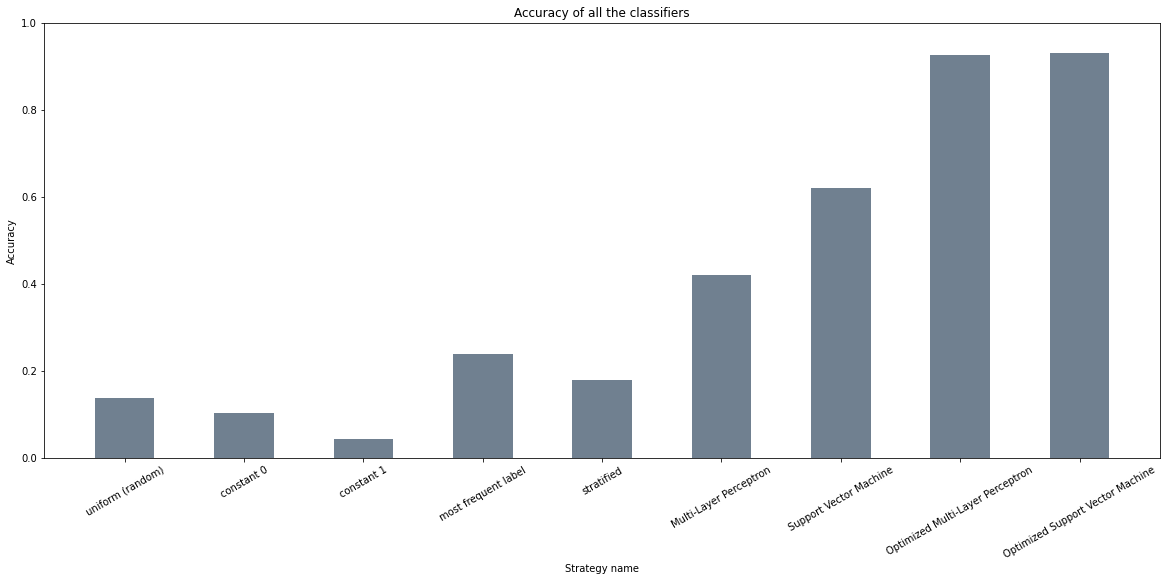

In [ ]:
import matplotlib.pyplot as plt
x = [key for key in beans_accuracy.keys()]
y = [value for value in beans_accuracy.values()]

fig = plt.figure(figsize = (20, 8))
barplot = plt.bar(x, y, width = 0.5, color = 'slategray')

plt.title("Accuracy of all the classifiers")
plt.ylabel("Accuracy")
plt.xlabel("Strategy name")
plt.xticks(rotation=30)
ax = plt.gca()
ax.set_ylim([0, 1])

plt.show()

* F1 score

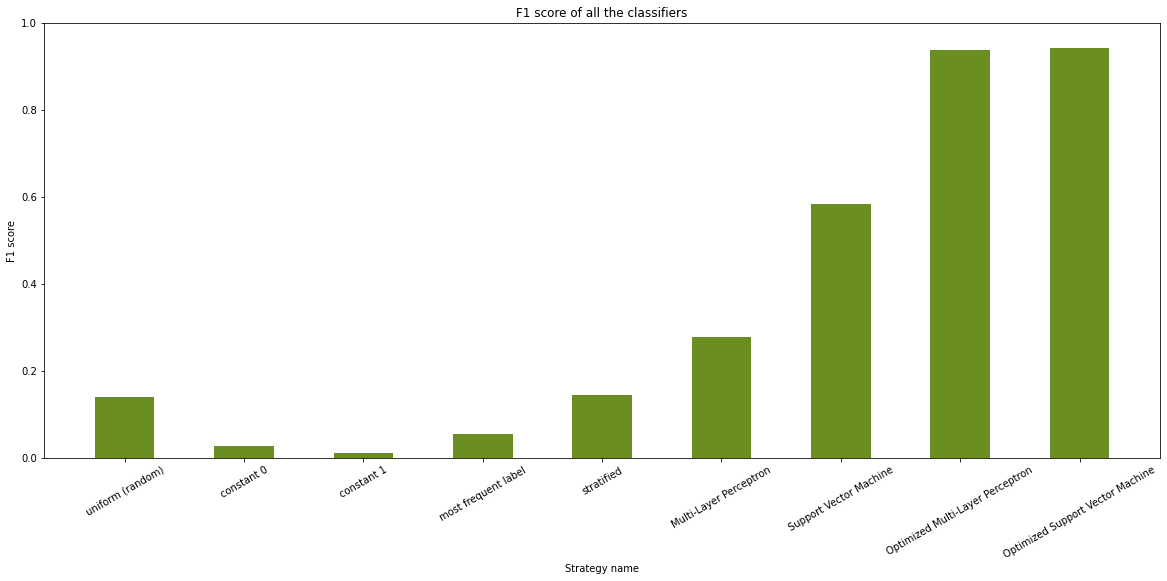

In [ ]:
x = [key for key in beans_f1.keys()]
y = [value for value in beans_f1.values()]

fig = plt.figure(figsize = (20, 8))
barplot = plt.bar(x,y, width = 0.5,color = 'olivedrab')

plt.title("F1 score of all the classifiers")
plt.ylabel("F1 score")
plt.xlabel("Strategy name")
plt.xticks(rotation=30)
ax = plt.gca()
ax.set_ylim([0, 1])

plt.show()

* Συγκριτικές γραφικές

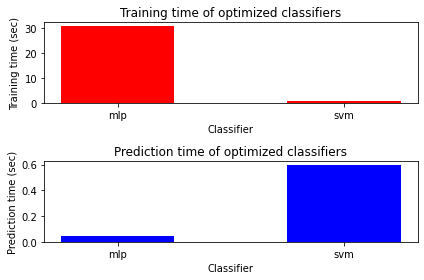

<Figure size 1440x576 with 0 Axes>

In [ ]:
x = [key for key in train_time.keys()]
y = [value for value in train_time.values()]

plt1 = plt.subplot(2,1,1, title='Training time of optimized classifiers', ylabel='Training time (sec)', xlabel='Classifier')
plt1.bar(x, y, width = 0.5, color = 'red')

x = [key for key in test_time.keys()]
y = [value for value in test_time.values()]

plt1 = plt.subplot(2,1,2, title='Prediction time of optimized classifiers', ylabel='Prediction time (sec)', xlabel='Classifier')
plt1.bar(x, y, width = 0.5, color = 'blue')

plt.tight_layout()
plt.figure(figsize=(20,8))
plt.show()

#### Multi-Layer Perceptron:

---

Η out-of-the-box επίδοση του ταξινομητή MLP δεν είναι ιδιαίτερα εντυπωσιακή. Με $accuracy=41.92\%$ και $F1=27.71\%$. 


Μετά από την πρώτη βελτιστοποίηση η μετρική $F1$ είχε αυξηθεί σε τιμή $93.8\%$, ήδη μια πολύ σημαντική αύξηση.

Η μετρική $F1$ στο αποτέλεσμα της δεύτερης αναζήτησης φαινόταν να είναι $94.6\%$, ωστόσο με διαδοχικές εκτελέσεις βλέπουμε ότι η μετρική αυτή αυξομειώνεται σε μικρό βαθμό, μερικές φορές φτάνοντας χαμηλότερες τιμές από της πρώτης αναζήτησης. Σε συνδυασμό με το γεγονός ότι ήδη η βελτίωση από την πρώτη αναζήτηση είναι σχεδόν αμελητέα, θα μπορούσε να πει κάποιος ότι η προηγούμενη εκτέλεσή μας προσφέρει την ίδια επίδοση με λιγότερους πόρους.

Ο χρόνος εκπαίδευσης του μοντέλου είναι περίπου 1000 φορές μεγαλύτερος από τον χρόνο πρόβλεψης. Αναμένουμε ο χρόνος εκπαίδευσης να είναι μεγάλος ειδικά στην περίπτωση του MLP, το οποίο πρέπει σε κάθε epoch να επαναπροσδιορίσει τα βάρη των πολυάριθμων perceptron που τον απαρτίζουν. Είναι εξαιρετικά εντυπωσιακός ο χρόνος πρόβλεψης ωστόσο, ο οποίος ήταν περίπου $0.05\ sec$ για περίπου $3500$ δείγματα, το οποίο ανάγεται στα $70000\ samples/sec$.

#### Support Vector Machine:

---

Η out-of-the-box επίδοση του ταξινομητή SVM έδωσε μετρικές $Accuracy=61.95\%$ και $F1=58.32\%$. Βλέπουμε ότι με τις default παραμέτρους αυτός ο ταξινομητής είναι σχεδόν δύο φορές καλύτερος από τον Multi-Layer Perceptron.


Μετά από την πρώτη αναζήτηση, βλέπουμε βελτίωση στην μετρική $F1=95.05\%$. 

Με την τελευταία αναζήτηση, η μετρική $F1$ έφτασε τιμή $F1=95.18\%$, μια αμελητέα βελτίωση σε σχέση με την προηγούμενη τιμή. Περαιτέρω, φαίνεται αυτές οι μετρικές να μην είναι πολύ σταθερές, και εκτός από τις παραμέτρους να εξαρτώνται και από την τύχη. Εκπαιδεύοντας εκ νέου στο ίδιο σύνολο έναν classifier με ακριβώς ίδιες παραμέτρους, βρίσκουμε $Accuracy=93\%$ και $F1=94.2\%$. Όπως αναφέραμε και πιο νωρίς, είναι πιθανόν ο ταξινομητής να φτάνει μια οριακή επίδοση αρκετά εύκολα, και στη συνέχεια να παράγει περίπου τα ίδια αποτελέσματα με μια απόκλιση η οποία εξαρτάται περισσότερο από την τύχη παρά από τις παραμέτρους που δώσαμε.

Όσον αφορά τους χρόνους του μοντέλου, ο χρόνος εκπαίδευσης και πρόβλεψης έχουν μικρή διαφορά μεταξύ τους, ανήκουν στην ίδια τάξη μεγέθους, και ο χρόνος εκπαίδευσης είναι πολύ μικρότερος από τον αντίστοιχο του MLP, περίπου $100$ φορές. Στον αντίποδα, ο χρόνος πρόβλεψης του SVM είναι $10$ φορές **μεγαλύτερος** από τον αντίστοιχο του MLP (για τα μοντέλα χρησιμοποιήσαμε ίδιο split rate για να έχει νόημα η σύγκριση των χρόνων), με περίπου $0.9\ sec$ για $3500$ δείγματα, που ανέγεται περίπου σε $5833\ samples/sec$, περίπου $12$ φορές λιγότερο από το αντίστοιχο του MLP.

#### **Παρατήρηση**

Για να αποφύγουμε το φαινόμενο της αποκλίνουσας επίδοσης, θα μπορούσαμε να κάνουμε μια διαφοροποίηση στο objective function του optuna. Θα μπορούσαμε αντί να δημιουργούμε έναν classifier με τις εκάστοτε παραμέτρους και να επιστρέφουμε το σφάλμα $1-F1$, να δημιουργούμε πολλαπλά αντίγραφα του ταξινομητή με ίδιες παραμέτρους, και να επιστρέφουμε τον μέσο όρο της μετρικής. Στα πλαίσια αυτής της εργασίας δεν εξετάζεται αυτό το ενδεχόμενο.

### *Συμπεράσματα:*

---

Βλέπουμε ότι από άποψη επίδοσης οι δύο ταξινομητές παρουσιάζουν πολύ παρόμοιες μετρικές, σε σημείο που ο καθοριστικός παράγοντας στην επιλογή του μοντέλου για την εκάστοτε εφαρμογή δεν θα είναι η καλύτερη ακρίβεια, αλλά ο χρόνος που χρειάζεται το κάθε μοντέλο.

- Σε περιπτώσεις που η ακρίβεια είναι ύψιστης σημασίας, όπως, ενδεχομένως, σε ένα ιατρικό σύστημα διάγνωσης, θα προτιμηθεί ο SVM για το ελάχιστο πλεονέκτημα που δίνει σε ακρίβεια πρόβλεψης. Φυσικά, εφόσον τα αποτελέσματά μας αφορούν μόνο το συγκεκριμένο dataset, δεν ταιριάζει η ιατρική χρήση του ταξινομητή, γιατί τα αποτελέσματα που βγάλαμε δε μπορούν να γενικευτούν γενικά στους ίδιους τους ταξινομητές, αλλά μπορεί να εφαρμοστεί σε κάθε περίπτωση όπου η **ακρίβεια** είναι πολύ σημαντική. Αυτό ωστόσο, είναι με την προϋπόθεση ότι όποιος φιλοξενεί την εφαρμογή μπορεί να κάνει ανάλογο scaling για να ανταποκριθεί στην κίνηση που θα έχει το σύστημα, διότι αυτό μας φέρνει στο επόμενο ζήτημα.

- Μια εφαρμογή για την οποία σημαντική είναι η γρήγορη ανταπόκριση και η διαδραστικότητα, ή μια εφαρμογή που θα έχει αυξημένη κίνηση και θα δέχεται συνεχώς αιτήματα για προβλέψεις, θα χρειαστεί οπωσδήποτε τον ταξινομητή MLP. Ο σημαντικά μικρότερος χρόνος πρόβλεψης του ταξινομητή θα επιτρέψει να παράγονται γρήγορα απαντήσεις για να μπορεί η εφαρμογή να συνεχίζει να λειτουργεί απρόσκοπτα, και να μην συσσωρεύονται πολλά αιτήματα στην ουρά αναμονής λόγω αυξημένου χρόνου επεξεργασίας τους.

- Τέλος, μια εφαρμογή για την οποία έχει ιδιαίτερα σημαντικό αντίκτυπο ο χρόνος εκπαίδευσης, θα πρέπει να προτιμήσει τον ταξινομητή SVM. Ο πολλαπλάσιος χρόνος εκπαίδευσης του ταξινομητή MLP, θα δημιουργήσει προβλήματα και καθυστερήσεις, σε ένα σύστημα το οποίο χρειάζεται συχνά να εισάγει καινούργια στοιχεία για να εκπαιδεύσει τον ταξινομητή του.